## Load fill and beam modes

In [132]:
import pytimber
import datetime
import pagestore
import time, calendar
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Retrieve data from database and start analysis

In [133]:
%matplotlib notebook
db=pagestore.PageStore('/home/nbiancac/HDD/Work/MD/LHC/DB/lhc.db','/home/nbiancac/HDD/Work/MD/LHC/DB/')
import LHC_BBQ, LHC_BCT, LHC_Energy, LHC_Coll, LHC_BQM, LHC_BSRT, LHC_FBCT

# filln=5294
# output_path='/home/nbiancac/HDD/Work/MD/LHC/'+str(filln)+'/'
# tag='scan_1a'
# os.system('mkdir -p '+output_path)
# beam=2
# ts1 = calendar.timegm(time.strptime("2016-09-11 02:15:00","%Y-%m-%d %H:%M:%S"))-2*3600
# ts2 = calendar.timegm(time.strptime("2016-09-11 02:40:00","%Y-%m-%d %H:%M:%S"))-2*3600

filln=5295
output_path='/home/nbiancac/HDD/Work/MD/LHC/'+str(filln)+'/'
os.system('mkdir -p '+output_path)
tag='scan_2'
beam=2
ts1 = calendar.timegm(time.strptime("2016-09-11 06:30:00","%Y-%m-%d %H:%M:%S"))-2*3600
ts2 = calendar.timegm(time.strptime("2016-09-11 08:30:00","%Y-%m-%d %H:%M:%S"))-2*3600

###  BSRT

expanding 0.0%
calc. emitt. 0.0%
calc. emitt. 8.3%
calc. emitt. 16.6%
calc. emitt. 24.9%
calc. emitt. 33.3%
calc. emitt. 41.6%
calc. emitt. 49.9%
calc. emitt. 58.2%
calc. emitt. 66.5%
calc. emitt. 74.8%
calc. emitt. 83.2%
calc. emitt. 91.5%
calc. emitt. 99.8%


<IPython.core.display.Javascript object>


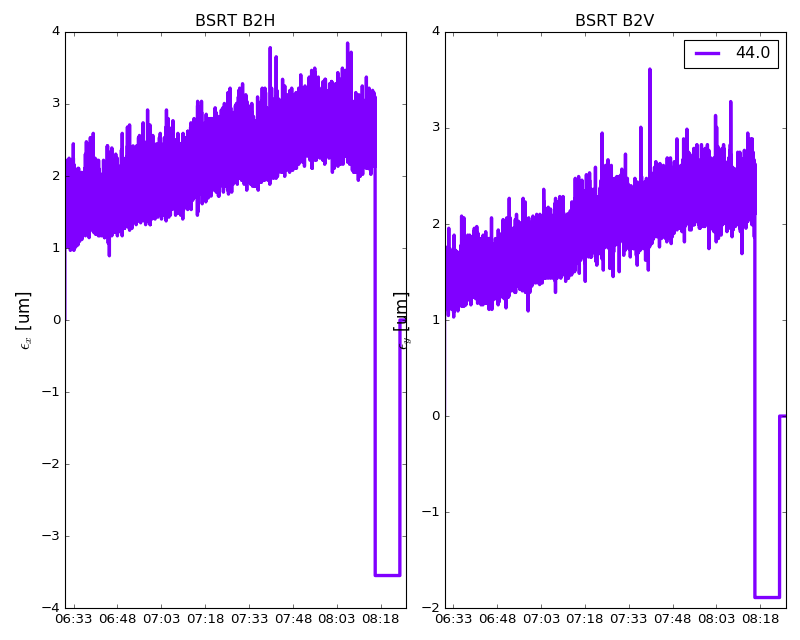

0


'/home/nbiancac/HDD/Work/MD/LHC/5295/scan_2_emit_B2.pdf'

In [134]:
# Energy
data=db.get(LHC_Energy.variable_list(beams=[beam]),ts1,ts2)
Energy = LHC_Energy.energy(data, beam = beam)

data=db.get(LHC_BSRT.variable_list(beams=[beam]),ts1,ts2)
BSRT = LHC_BSRT.BSRT(data,beam)
BSRT.calculate_emittances(Energy, filln)
# BSRT.get_bunches_effectively_recorded()


from cycler import cycler
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(BSRT.bunch_n))))


fig = plt.figure(figsize=(10,8))

p_vec=[]

for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)):
    mask_bunch = np.where(BSRT.bunch_n==bunch_n)[0]
    print ind
    plt.subplot(1,2,1)
#     BSRT.norm_emit_h[np.where(BSRT.sigma_h == 0.)]=np.NAN
#     BSRT.norm_emit_v[np.where(BSRT.sigma_v == 0.)]=np.NAN
    p, = plt.plot(BSRT.t_str[mask_bunch],BSRT.norm_emit_h[mask_bunch],'-',color = colors[ind],  linewidth = 3)
    plt.subplot(1,2,2)
    p, = plt.plot(BSRT.t_str[mask_bunch],BSRT.norm_emit_v[mask_bunch],'-',color = colors[ind],  linewidth = 3)
    p_vec.append(p)

plt.subplot(1,2,1)
hfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(hfmt)
plt.tight_layout()
# plt.ylim(0,4)
plt.ylabel('$\epsilon_x$ [um]', fontsize =15)
plt.title('BSRT B%dH'%beam)

plt.subplot(1,2,2)
lgd = plt.legend(p_vec, np.unique(BSRT.bunch_n)+1)    
hfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(hfmt)
plt.tight_layout()
# plt.ylim(0,4)
plt.ylabel('$\epsilon_y$ [um]', fontsize =15)

plt.title('BSRT B%dV'%beam)

plt.savefig(output_path+tag+'_emit_B'+str(beam)+'.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(output_path+tag+'_emit_B'+str(beam)+'.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
output_path+tag+'_emit_B'+str(beam)+'.pdf'


### FBCT

<IPython.core.display.Javascript object>


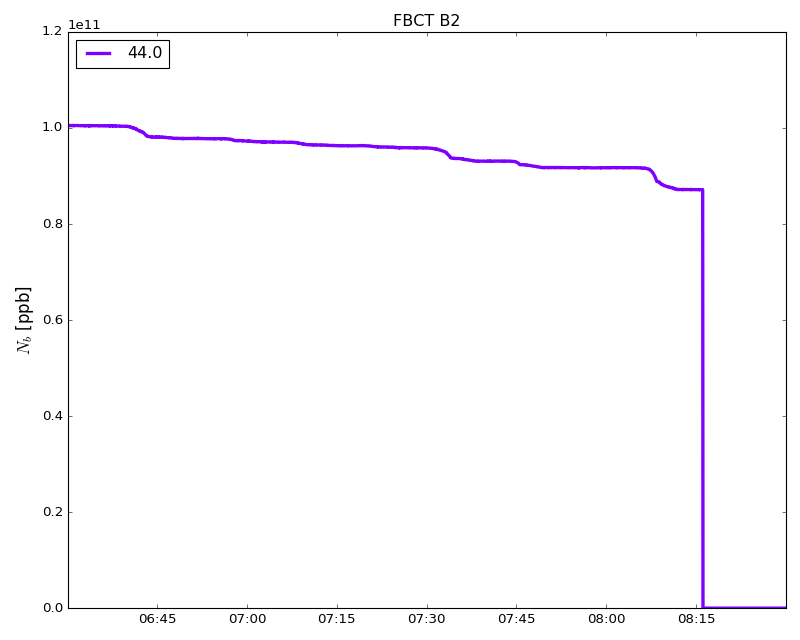

'/home/nbiancac/HDD/Work/MD/LHC/5295/scan_2_fbct_B2.pdf'

In [135]:
data=db.get(LHC_FBCT.variable_list(beams=[beam]),ts1,ts2)
FBCT = LHC_FBCT.FBCT(data, beam = beam)

fig = plt.figure(figsize=(10,8))

p_vec=[]

for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)):
    p, = plt.plot( FBCT.t_str, FBCT.bint[:,int(bunch_n)],'-',color = colors[ind], linewidth = 3)
    
    p_vec.append(p)
hfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(hfmt)
# plt.ylim(0,5)
lgd = plt.legend(p_vec, np.unique(BSRT.bunch_n)+1, loc = 2)   
plt.ylabel('$N_b$ [ppb]', fontsize = 15)    
plt.title('FBCT B%d'%((beam)))

plt.tight_layout()

plt.savefig(output_path+tag+'_fbct_B'+str(beam)+'.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(output_path+tag+'_fbct_B'+str(beam)+'.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
output_path+tag+'_fbct_B'+str(beam)+'.pdf'


###  BQM

In [136]:
beamMode1 = 'INJPROT'
beamMode2 = 'BEAMDUMP'

ldb = pytimber.LoggingDB(source='ldb')

a =ldb.getLHCFillData(fill_number=filln)['beamModes']
for ind,el in enumerate(a):
    if el['mode'] == beamMode1:
        ts1_fill=ldb.getLHCFillData(fill_number=filln)['beamModes'][ind]['startTime']
        print beamMode1+' startTime: %.1f'%ts1

for ind,el in enumerate(a):
    if el['mode'] == beamMode2:
        ts2_fill=ldb.getLHCFillData(fill_number=filln)['beamModes'][ind]['startTime']
        print beamMode2+' startTime: %.1f'%ts2

        
# data = ldb.get(LHC_BQM.variable_list(beams=[beam]),ts1_fill,ts2_fill)

# db=pagestore.PageStore('/home/nbiancac/HDD/Work/MD/LHC/DB/lhc.db','/home/nbiancac/HDD/Work/MD/LHC/DB/')
# db.store(data)

INJPROT startTime: 1473568200.0
BEAMDUMP startTime: 1473575400.0


Start building fillbucket matrix
Done


<IPython.core.display.Javascript object>


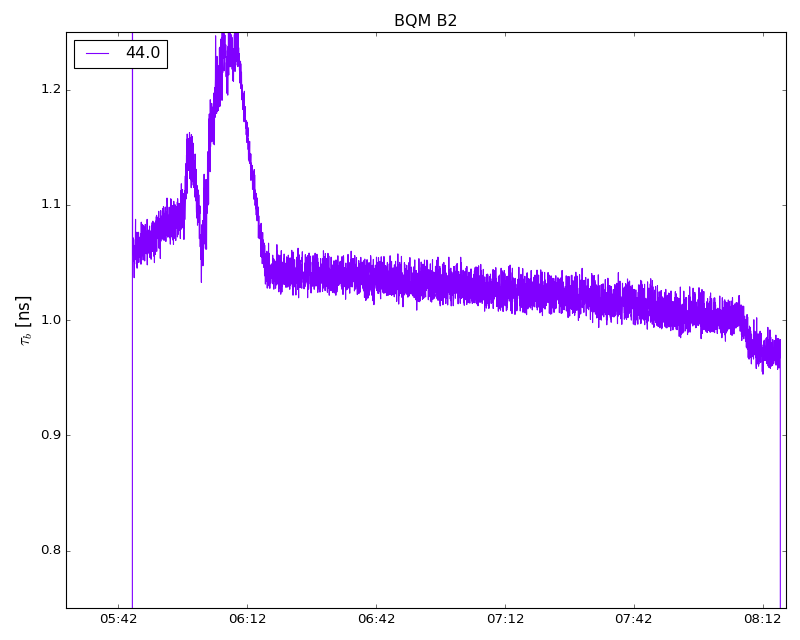

'/home/nbiancac/HDD/Work/MD/LHC/5295/scan_2_bl_B2.pdf'

In [137]:
data = db.get(LHC_BQM.variable_list(beams=[beam]),ts1_fill,ts2_fill)
bl = LHC_BQM.blength(data, None, beam = beam)

fig = plt.figure(figsize=(10,8))

p_vec=[]
for ind, bunch_n in enumerate(np.unique(BSRT.bunch_n)):
    p, = plt.plot( bl.t_str, (bl.blen[:,int(bunch_n)])*1e9,'-',color = colors[ind])
    p_vec.append(p)

hfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(hfmt)
# plt.ylim(0,5)
lgd = plt.legend(p_vec, np.unique(BSRT.bunch_n)+1, loc = 2)   
plt.ylabel('$\\tau_b$ [ns]', fontsize = 15)    
plt.title('BQM B%d'%((beam)))

plt.tight_layout()
plt.ylim(0.75, 1.25)

plt.savefig(output_path+tag+'_bl_B'+str(beam)+'.pdf', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(output_path+tag+'_bl_B'+str(beam)+'.png', transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')
output_path+tag+'_bl_B'+str(beam)+'.pdf'

### Collimators

<IPython.core.display.Javascript object>


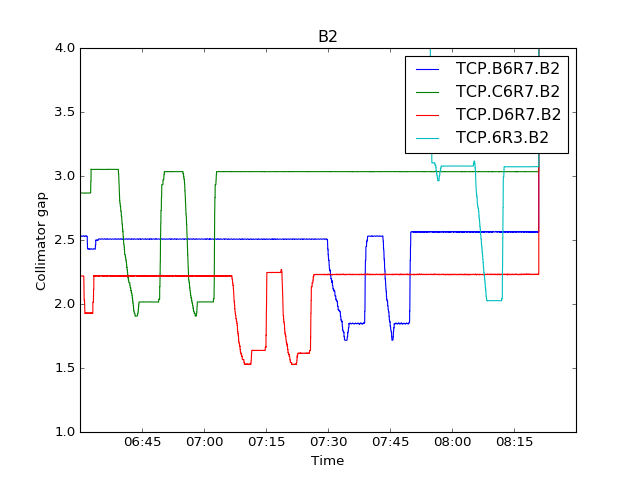

'/home/nbiancac/HDD/Work/MD/LHC/5295/scan_2_gap_B2.pdf'

In [138]:
data=db.get(LHC_Coll.variable_list(beam),ts1,ts2)

Coll=LHC_Coll.Coll(data,beam=beam)
typecoll=['L','R']

namecolls = ['TCP.'+tagcoll+'6'+typecoll[beam-1]+'7.B'+str(beam) for tagcoll in ['B','C', 'D']]
namecolls.append('TCP.6'+typecoll[beam-1]+'3.B'+str(beam))

plt.figure()
for namecoll in namecolls:
    Coll.select_coll(namecoll+':MEAS_LVDT_GU')
    plt.plot(Coll.t_str, Coll.values)
plt.xlabel("Time")
plt.ylabel("Collimator gap")
plt.title('B%d'%(Coll.beam))
plt.legend(namecolls)
xfmt = mpl.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(xfmt)
plt.ylim(1,4)
plt.savefig(output_path+tag+'_gap_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_gap_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_gap_B'+str(beam)+'.pdf'

### Damp beam parameters at given time

In [139]:
import pickle as pkl

output_path = '/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/MD/'
time_str_vec = ['2016-09-11_06:46:00', '2016-09-11_06:52:00',
                    '2016-09-11_07:14:00','2016-09-11_07:17:00',
                    '2016-09-11_07:37:00', '2016-09-11_07:41:00',
                    '2016-09-11_08:09:00','2016-09-11_08:14:00']

for time_str in time_str_vec:
    
    x = calendar.timegm(time.strptime(time_str,"%Y-%m-%d_%H:%M:%S"))
    

    for ibunch, bunch_n in enumerate(np.unique(BSRT.bunch_n)):
       
        bunch ={'intensity':[], 'bunch_length':[], 'emit_H':[],'emit_V':[],'time':[],'bucket':[]}
        ind  = (np.abs((FBCT.t_stamps)-(x-2*3600))).argmin()
        bunch['intensity'] = FBCT.bint[ind,int(bunch_n)]
        
        ind =  (np.abs((bl.t_stamps)-(x-2*3600))).argmin()
        bunch['bunch_length'] = bl.blen[ind,int(bunch_n)]
        
        ind =  np.abs((BSRT.t_stamps-(x-2*3600))).argmin()
        mask_bunch = np.where(BSRT.bunch_n==bunch_n)[0]
        bunch['emit_H'] = BSRT.norm_emit_h[mask_bunch][ind]
        bunch['emit_V'] = BSRT.norm_emit_v[mask_bunch][ind]

        
        bunch['time'] = time_str 
        bunch['bucket'] = int(bunch_n)+1
        
        ind = np.abs((Energy.t_stamps-(x-2*3600))).argmin()
        bunch['energy'] = Energy.energy[ind]
        
        if beam == 1:
            bunch['Qpx'] = 5.91
            bunch['Qpy'] = 3.04
        else:
            bunch['Qpx'] = 7.16
            bunch['Qpy'] = 3.31
            
        pkl.dump(bunch, open(output_path+tag+'_bunch_'+str(int(bunch_n))+'_'+time_str+'_B'+str(beam)+'.pkl','wb'))
        print output_path+tag+'_bunch_'+str(int(bunch_n))+'_'+time_str+'_B'+str(beam)+'.pkl'

/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/MD/scan_2_bunch_43_2016-09-11_06:46:00_B2.pkl
/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/MD/scan_2_bunch_43_2016-09-11_06:52:00_B2.pkl
/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/MD/scan_2_bunch_43_2016-09-11_07:14:00_B2.pkl
/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/MD/scan_2_bunch_43_2016-09-11_07:17:00_B2.pkl
/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/MD/scan_2_bunch_43_2016-09-11_07:37:00_B2.pkl
/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/MD/scan_2_bunch_43_2016-09-11_07:41:00_B2.pkl
/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/MD/scan_2_bunch_43_2016-09-11_08:09:00_B2.pkl
/afs/cern.ch/work/n/nbiancac/scratch0/DELPHI_results/LHC/MD/scan_2_bunch_43_2016-09-11_08:14:00_B2.pkl


### BBQ spectrogram

<IPython.core.display.Javascript object>


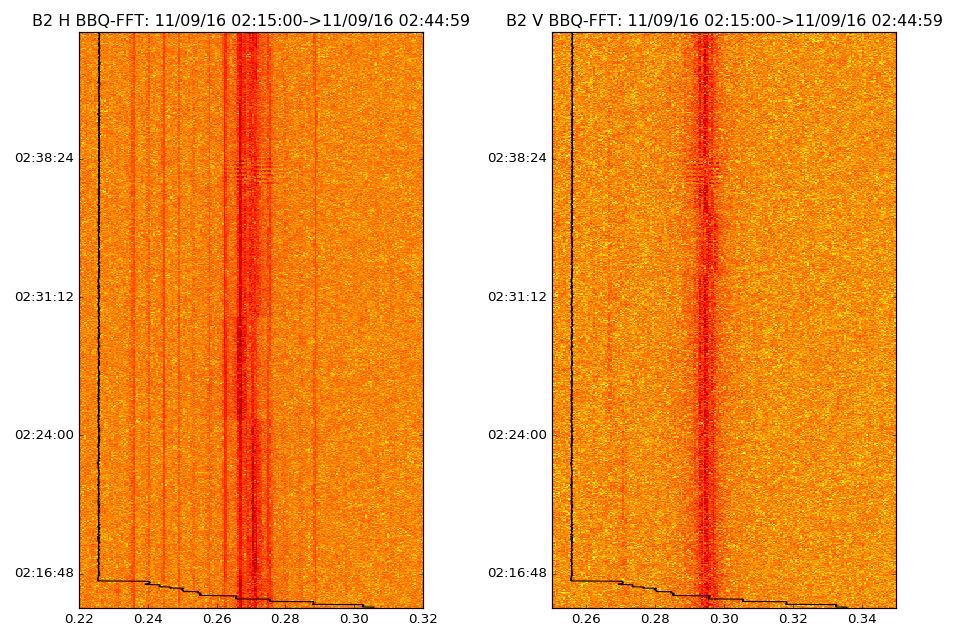

'/home/nbiancac/HDD/Work/MD/LHC/5130/scan_1a_specgram_B2.pdf'

In [15]:
from scipy import signal

f, t, Sxx = signal.spectrogram(BBQ_RAW.h, fs = 1, nperseg = 2048, noverlap=0)

plt.figure(figsize=(12,8))
ax1 = plt.subplot(121)
mindate = mpl.dates.date2num(BBQ_RAW.t_str[0])
maxdate = mpl.dates.date2num(BBQ_RAW.t_str[-1])
plt.imshow(np.log10(np.squeeze(Sxx)), origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = mpl.dates.DateFormatter('%H:%M:%S')
plt.gca().yaxis.set_major_formatter(hfmt)

plt.title('B%d H BBQ-FFT: '%BBQ_RAW.beam +
    str(BBQ_RAW.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_RAW.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

plt.xlim(0.22, 0.32)

# with collimators
ax2 = ax1.twiny()
ax2.plot(Coll.values, Coll.t_str,"-k")
ax2.set_ylim(Coll.t_str[0], Coll.t_str[-1])
ax2.set_xticks([])

f, t, Syy = signal.spectrogram(BBQ_RAW.v, fs = 1, nperseg = 2048, noverlap=0)

ax1 = plt.subplot(122)
mindate = mpl.dates.date2num(BBQ_RAW.t_str[0])
maxdate = mpl.dates.date2num(BBQ_RAW.t_str[-1])
plt.imshow(np.log10(np.squeeze(Syy)), origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = mpl.dates.DateFormatter('%H:%M:%S')
plt.gca().yaxis.set_major_formatter(hfmt)

plt.title('B%d V BBQ-FFT: '%BBQ_RAW.beam +
    str(BBQ_RAW.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_RAW.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

plt.xlim(0.25, 0.35)


del(Sxx,Syy)
# with collimators
ax2 = ax1.twiny()
ax2.plot(Coll.values, Coll.t_str,"-k")
ax2.set_ylim(Coll.t_str[0], Coll.t_str[-1])
ax2.set_xticks([])
plt.tight_layout()
plt.savefig(output_path+tag+'_specgram_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_specgram_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_specgram_B'+str(beam)+'.pdf'

### Sussix

In [7]:
import PySussix as ps

# Sussix settings
nt1=1; nt2=2048;
nharm = 15

tunex0 = 0.27
tuney0 = 0.295
ex0 = 1e-3
ey0 = 1e-3

tuney_vec=[];tunex_vec=[];
spec_ox=[]; spec_oy=[];
spec_ax=[]; spec_ay=[];
spec_t=[];

for ii in np.arange(0, len(BBQ_RAW.v)):
    
    datax=BBQ_RAW.h[ii][nt1:nt2]-np.mean(BBQ_RAW.h[ii][nt1:nt2])
    datay=BBQ_RAW.v[ii][nt1:nt2]-np.mean(BBQ_RAW.v[ii][nt1:nt2])
    spec=ps.Sussix()
    spec.sussix_inp(nt1=nt1,nt2=nt2,tunex=tunex0,tuney=tuney0,ex=ex0,ey=ey0,ir=1,nharm=nharm)
    spec.sussix(datax,0*datax, 
                datay, 0*datay, 
                0*datax, 0*datay)
    

    
    spec.ox=np.abs(spec.ox)
    spec.oy=np.abs(spec.oy)
    
    spec_ox.append(spec.ox[0:nharm-1])
    spec_oy.append(spec.oy[0:nharm-1])
    spec_ax.append(spec.ax[0:nharm-1])
    spec_ay.append(spec.ay[0:nharm-1])
    spec_t.append(BBQ_RAW.t_stamps[ii]*(1+np.random.randn(1,nharm-1)*1e-12))
    
    del(datax,datay)

In [8]:
[tunex_min, tunex_max] = np.sort([0.2671 , 0.2682])
[tuney_min, tuney_max] = np.sort([0.2905 , 0.2935])

rangex=np.array([tunex_min, tunex_max])
rangey=np.array([tuney_min, tuney_max])

tuney_vec=[]

for ii,index in enumerate((np.abs(spec_oy) < rangey.max()) & (np.abs(spec_oy) > rangey.min())):
    spec.oy = np.squeeze(spec_oy[ii])[index]
    spec.ay = np.squeeze(spec_ay[ii])[index]
    
    if len(spec.ay):
        tuney=spec.oy[spec.ay.argmax()]
    else:
        tuney=np.NaN
    tuney_vec.append(tuney)

BBQ_RAW.qv=np.array(tuney_vec)

tunex_vec=[]

for ii,index in enumerate((np.abs(spec_ox) < rangex.max()) & (np.abs(spec_ox) > rangex.min())):
    spec.ox = np.squeeze(spec_ox[ii])[index]
    spec.ax = np.squeeze(spec_ax[ii])[index]
    
    if len(spec.ax):
        tunex=spec.ox[spec.ax.argmax()]
    else:
        tunex=np.NaN
    tunex_vec.append(tunex)

BBQ_RAW.qh=np.array(tunex_vec)

<IPython.core.display.Javascript object>


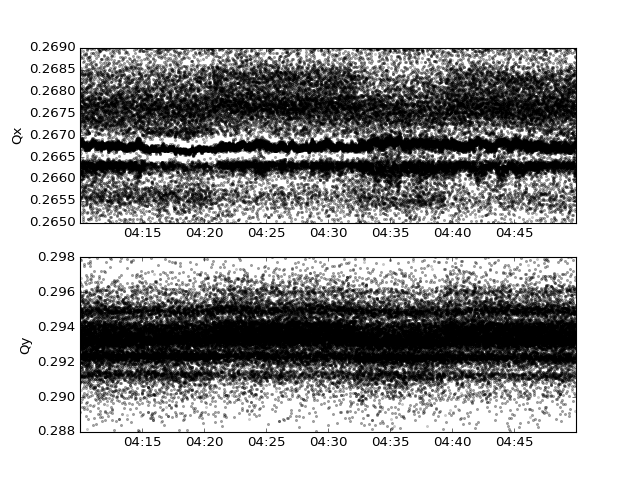

'/home/nbiancac/HDD/Work/MD/LHC/5130/scan_1a_sussix_B2.pdf'

In [9]:
t_stamp = np.squeeze(np.reshape(np.asarray(spec_t),(1,-1)))
t_str = [datetime.datetime.fromtimestamp(x) for x in t_stamp]

plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(t_str,np.squeeze(np.reshape(np.asarray(spec_ox),(1,-1))),'ok',alpha=0.2,markerfacecolor='k', markersize=2)
# plt.plot(BBQ_RAW.t_str,BBQ_RAW.qh,'or',alpha=0.2,markerfacecolor='r', markersize=2)
plt.ylabel('Qx')
plt.ylim(0.265 ,0.269)
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax1 = plt.subplot(2,1,2)
plt.plot(t_str,np.squeeze(np.reshape(np.asarray(spec_oy),(1,-1))),'ok',alpha=0.2,markerfacecolor='k',markersize=2)
# plt.plot(BBQ_RAW.t_str,BBQ_RAW.qv,'or',alpha=0.2,markerfacecolor='r', markersize=2)
plt.ylabel('Qy')
plt.ylim(0.288 ,0.298)
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

plt.savefig(output_path+tag+'_sussix_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_sussix_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_sussix_B'+str(beam)+'.pdf'

### Interpolate gaps on tune data

In [ ]:
# Get rid of the nans...
ind_nan=~np.isnan(BBQ_RAW.qh) & ~np.isnan(BBQ_RAW.qv)
temp_h=BBQ_RAW.qh[ind_nan]
temp_v=BBQ_RAW.qv[ind_nan]
temp_t_stamps=BBQ_RAW.t_stamps[ind_nan]
temp_t_str= np.array(BBQ_RAW.t_str)[ind_nan]

BBQ_RAW.qh=temp_h;
BBQ_RAW.qv=temp_v;
BBQ_RAW.t_stamps= temp_t_stamps
BBQ_RAW.t_str= temp_t_str


# Interpolate collgaps on BBQ timestamps
Coll.interp_with(BBQ_RAW)
len(Coll.t_str), len(BBQ_RAW.t_str)

In [ ]:
fig = plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_ylabel('Collimator full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qh,  'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
ax2.set_ylabel('$Q_x$', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
plt.ylim(rangex.min(), rangex.max())
ax2.legend(['B'+str(beam)+'H'])

ax1 = plt.subplot(2,1,2)
ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Collimator full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qv,  'or',alpha=0.2,markerfacecolor='r',markeredgecolor='r')
ax2.set_ylabel('$Q_y$', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
plt.ylim(rangey.min(), rangey.max())
ax2.legend(['B'+str(beam)+'V'])

plt.savefig(output_path+tag+'_sussix-clean_B'+str(beam)+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_sussix-clean_B'+str(beam)+'.png', transparent=True)
output_path+tag+'_sussix-clean_B'+str(beam)+'.pdf'

### Moving average

In [ ]:
N=250

BBQ_RAW.qv_ma=np.convolve(np.ravel(BBQ_RAW.qv), np.ones((N,))/N,mode='same')

BBQ_RAW.qh_ma=np.convolve(np.ravel(BBQ_RAW.qh), np.ones((N,))/N,mode='same')

Coll.values_ma=np.convolve(np.ravel(Coll.values), np.ones((N,))/N,mode='same')

fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qh, 'k.')
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qh_ma, '-r')
ax2.set_ylabel('$Q_x$', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
plt.ylim(rangex.min(), rangex.max())

fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qv, 'r.')
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qv_ma, '-k')
ax2.set_ylabel('$Q_y$', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
plt.ylim(rangey.min(), rangey.max())



In [ ]:
gu=0.95*Coll.values.max();
gd=1.05*Coll.values.min()

mask=(Coll.values_ma>gu) & (Coll.values_ma< Coll.values.max())

fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('halfgap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(np.array(BBQ_RAW.t_str)[mask], BBQ_RAW.qv_ma[mask], 'r.')
ax2.set_ylabel('BBQ', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
plt.ylim(rangey.min(), rangey.max())

mask=(Coll.values_ma<gd) & (Coll.values_ma> Coll.values.min())
ax2.plot(np.array(BBQ_RAW.t_str)[mask], BBQ_RAW.qv_ma[mask], 'r.')

### Final plots

In [ ]:
gu=0.95*Coll.values.max();
gd=1.05*Coll.values.min()
plane='V'

# get out slope from measurement
x=BBQ_RAW.t_stamps
y=BBQ_RAW.qv_ma

mask_tune=(y<tuney_max) & (y>tuney_min)
p=np.polyfit(x[mask_tune],y[mask_tune],1)
slope=p[0]
intercept=p[1]
fit=slope*x+intercept

plt.figure()
plt.plot(BBQ_RAW.t_stamps,BBQ_RAW.qv_ma)
plt.plot(BBQ_RAW.t_stamps[mask_tune],fit[mask_tune])
plt.ylim(tuney_min, tuney_max)

# Upper gap
mask1=(Coll.values_ma>gu) 
x=BBQ_RAW.t_stamps[mask1]
y=BBQ_RAW.qv_ma[mask1]
fit1=fit[mask1]

mask_tune=(y<tuney_max) & (y>tuney_min)

y1=y-fit1
y1_mean=np.mean(y1[mask_tune])
y1_std=np.std(y1[mask_tune])

# Lower gap
mask2=(Coll.values_ma<gd) 
x=BBQ_RAW.t_stamps[mask2]
y=BBQ_RAW.qv_ma[mask2]

fit2=fit[mask2]
mask_tune=(y<tuney_max) & (y>tuney_min)

y2=y-fit2
y2_mean=np.mean(y2[mask_tune])
y2_std=np.std(y2[mask_tune])

ts_mean=y1_mean- y2_mean
ts_std=y1_std+y2_std

plt.figure(figsize=(10,5), facecolor='white')
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
h2, = ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Collimator full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
ax1.annotate('$\Delta Q_'+plane+'$= %.1e+/-%.1e'%(ts_mean,ts_std),xy=(Coll.t_str[5], Coll.values_ma[5]))
plt.title(tag.replace('_',' ')+' B'+str(beam)+plane)
ax2 = ax1.twinx()
h0, = ax2.plot(np.array(BBQ_RAW.t_str)[mask1], y1, 'or',alpha=0.5,markerfacecolor='r',markeredgecolor='r')
h1, = ax2.plot(np.array(BBQ_RAW.t_str)[mask2][mask_tune], y2[mask_tune], 'ok',alpha=.5,markerfacecolor='k',markeredgecolor='k')
ax2.set_ylim(-2.5e-4, 2.5e-4)
ax2.yaxis.set_ticks([])

plt.legend([h0, h1, h2],['$Q_'+plane+'$ gap up' , '$Q_'+plane+'$ gap down', 'Collimator full gap'])


# distribution
ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
ax1.set_ylim(-2.5e-4, 2.5e-4)
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks([])

ax2=ax1.twinx()
n, bins, patches = plt.hist(y1, 100, range = (-2.5e-4, 2.5e-4), normed=1, facecolor='r', alpha=0.75, orientation="horizontal")
n, bins, patches = plt.hist(y2, 100, range = (-2.5e-4, 2.5e-4), normed=1, facecolor='k', alpha=0.75, orientation="horizontal")
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks([-2e-4, -1e-4, 0, 1e-4, 2e-4])
ax2.set_ylabel('$\Delta Q_'+plane+'$')
ax2.set_ylim(-2.5e-4, 2.5e-4)
plt.tight_layout()


print '%.1e+/-%.1e'%(y1_mean,y1_std)
print '%.1e+/-%.1e'%(y2_mean,y2_std)
print 'tune shift: %.1e+/-%.1e'%(ts_mean,ts_std)

plt.savefig(output_path+tag+'_tune_vs_gap_B'+str(beam)+plane+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_tune_vs_gap_B'+str(beam)+plane+'.png', transparent=True)
output_path+tag+'_tune_vs_gap_B'+str(beam)+plane+'.pdf'

In [ ]:
gu=0.95*Coll.values.max();
gd=1.05*Coll.values.min()
plane='H'

# get out slope from measurement
x=BBQ_RAW.t_stamps
y=BBQ_RAW.qh_ma

mask_tune=(y<tunex_max) & (y>tunex_min)
p=np.polyfit(x[mask_tune],y[mask_tune],1)
slope=p[0]
intercept=p[1]
fit=slope*x+intercept

plt.figure()
plt.plot(BBQ_RAW.t_stamps,BBQ_RAW.qh_ma)
plt.plot(BBQ_RAW.t_stamps[mask_tune],fit[mask_tune])
plt.ylim(tunex_min, tunex_max)

# Upper gap
mask1=(Coll.values_ma>gu) 
x=BBQ_RAW.t_stamps[mask1]
y=BBQ_RAW.qh_ma[mask1]
fit1=fit[mask1]

mask_tune=(y<tunex_max) & (y>tunex_min)

y1=y-fit1
y1_mean=np.mean(y1[mask_tune])
y1_std=np.std(y1[mask_tune])

# Lower gap
mask2=(Coll.values_ma<gd) 
x=BBQ_RAW.t_stamps[mask2]
y=BBQ_RAW.qh_ma[mask2]

fit2=fit[mask2]
mask_tune=(y<tunex_max) & (y>tunex_min)

y2=y-fit2
y2_mean=np.mean(y2[mask_tune])
y2_std=np.std(y2[mask_tune])

ts_mean=y1_mean- y2_mean
ts_std=y1_std+y2_std

plt.figure(figsize=(10,5), facecolor='white')
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
h2, = ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Collimator full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
ax1.annotate('$\Delta Q_'+plane+'$= %.1e+/-%.1e'%(ts_mean,ts_std),xy=(Coll.t_str[5], Coll.values_ma[5]))
plt.title(tag.replace('_',' ')+' B'+str(beam)+plane)
ax2 = ax1.twinx()
h0, = ax2.plot(np.array(BBQ_RAW.t_str)[mask1], y1, 'or',alpha=0.5,markerfacecolor='r',markeredgecolor='r')
h1, = ax2.plot(np.array(BBQ_RAW.t_str)[mask2][mask_tune], y2[mask_tune], 'ok',alpha=.5,markerfacecolor='k',markeredgecolor='k')
ax2.set_ylim(-2.5e-4, 2.5e-4)
ax2.yaxis.set_ticks([])

plt.legend([h0, h1, h2],['$Q_'+plane+'$ gap up' , '$Q_'+plane+'$ gap down', 'Collimator full gap'])



# distribution
ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
ax1.set_ylim(-2.5e-4, 2.5e-4)
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks([])

ax2=ax1.twinx()
n, bins, patches = plt.hist(y1, 100, range = (-2.5e-4, 2.5e-4), normed=1, facecolor='r', alpha=0.75, orientation="horizontal")
n, bins, patches = plt.hist(y2, 100, range = (-2.5e-4, 2.5e-4), normed=1, facecolor='k', alpha=0.75, orientation="horizontal")
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks([-2e-4, -1e-4, 0, 1e-4, 2e-4])
ax2.set_ylabel('$\Delta Q_'+plane+'$')
ax2.set_ylim(-2.5e-4, 2.5e-4)
plt.tight_layout()


print '%.1e+/-%.1e'%(y1_mean,y1_std)
print '%.1e+/-%.1e'%(y2_mean,y2_std)
print 'tune shift: %.1e+/-%.1e'%(ts_mean,ts_std)

plt.savefig(output_path+tag+'_tune_vs_gap_B'+str(beam)+plane+'.pdf', transparent=True)
plt.savefig(output_path+tag+'_tune_vs_gap_B'+str(beam)+plane+'.png', transparent=True)
output_path+tag+'_tune_vs_gap_B'+str(beam)+plane+'.pdf'